In [3]:
# Importing packages

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#Connect to google drive to use data directly from the cloud there. Because in first time, the server was  
#not available so i was in the obligation of working from a powerful distant computer using the cloud
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
folder_img_path="/content/drive/MyDrive/Stage_2A_L'HAMDI/Images_test"
images_names=os.listdir(folder_img_path)


In [9]:
#Printing the total number of images in that particular day sample
print(len(images_names))

1280


# 1- **Visualising some images...**

/content/drive/MyDrive/Stage_2A_L'HAMDI/Images_test/20220222142400_12.jpg


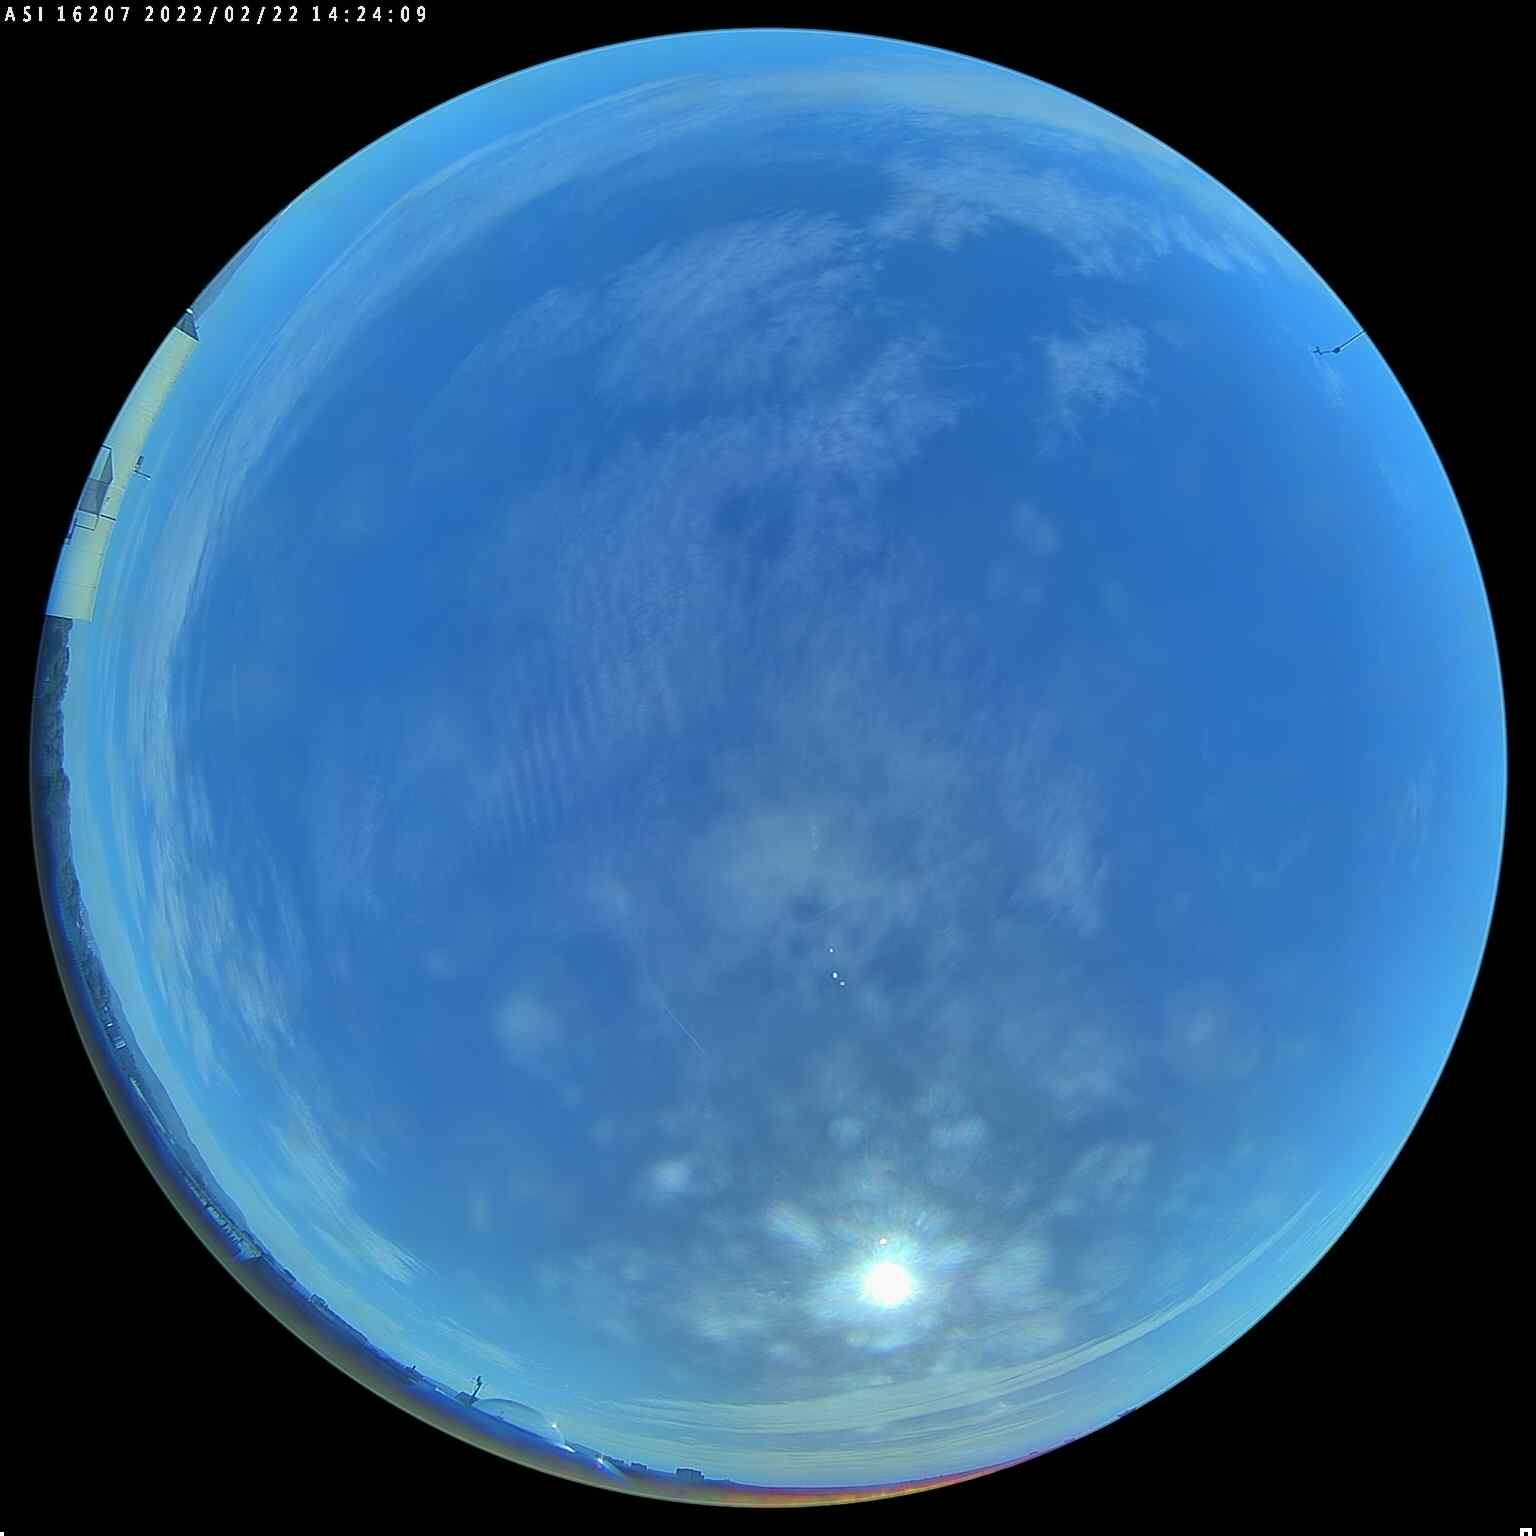

In [10]:
from google.colab.patches import cv2_imshow
import cv2

img=images_names[10]
image=cv2.imread(folder_img_path+"/"+str(img))
print(folder_img_path+"/"+str(img))
#/content/Images/20220222060500_11.jpg

cv2_imshow(image)  # Display the image using cv2_imshow()

cv2.waitKey(0)
cv2.destroyAllWindows()

Display a specific image according to its reference code, this will alow us to view any image from our database

/content/drive/MyDrive/Stage_2A_L'HAMDI/Images_test/20220222140800_11.jpg


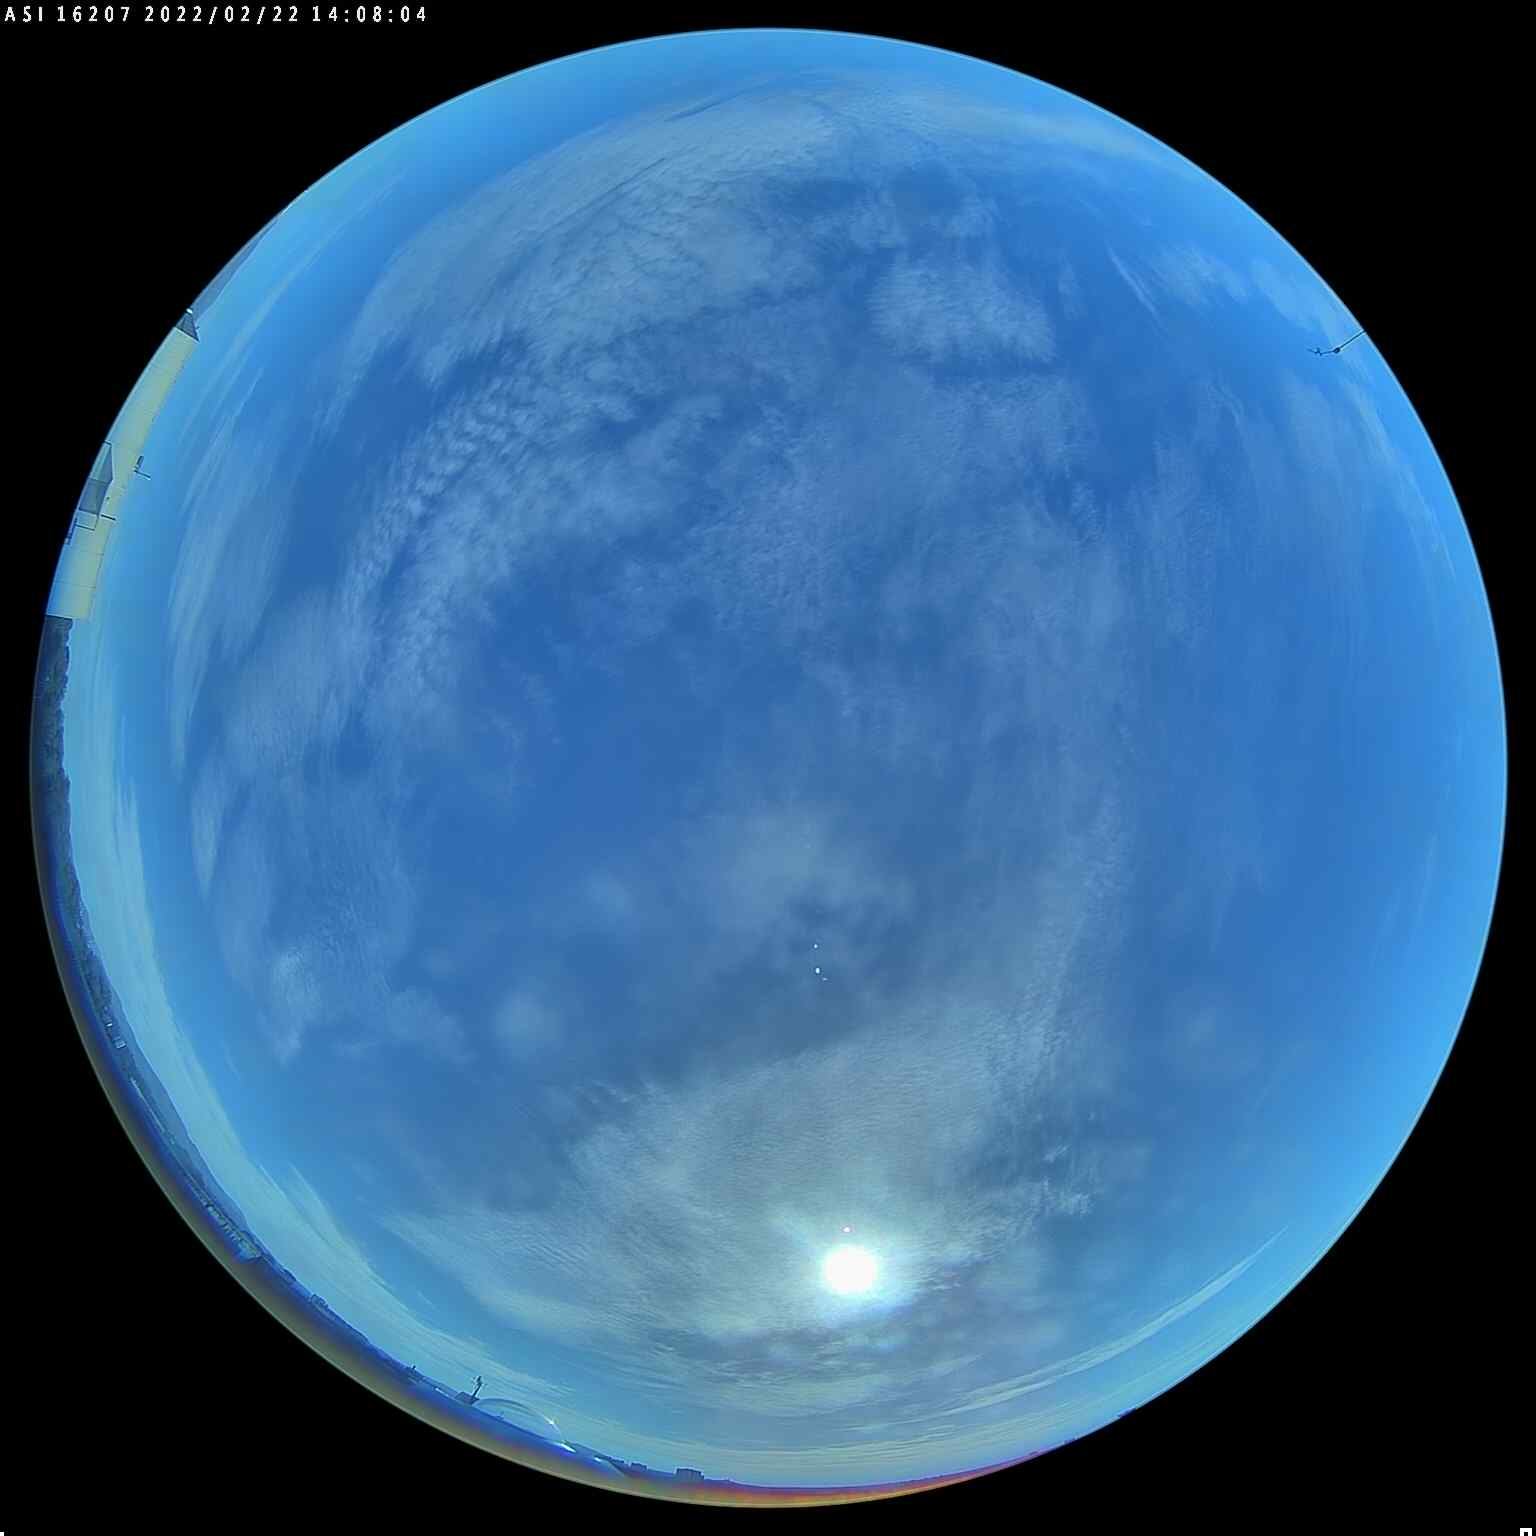

In [ ]:
#Here in our first case, all the images have this reference: 20220222, and after that,
#it starts from 060 500_11, 060 500_12 up to 142 400_11 and 142 400_12, which correspond to the time the photo was captured at.
def afficher_img(ref):

  path=folder_img_path+"/"+"20220222"+ref+".jpg"
  img=cv2.imread(path)
  print(path)
  cv2_imshow(img)

  cv2.waitKey(0)
  cv2.destroyAllWindows()

afficher_img("140800_11")



# 2- **Read raw data from excel file**

In [12]:
data=pd.read_csv("/content/drive/MyDrive/Stage_2A_L'HAMDI/peridata_16207_20220222.csv", delimiter=';')

In [13]:
data

,V-----,SWVNR=2001253,SQNDL=2,DATE=22-02-22,TIME=00:00:06,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,Unnamed: 22
0,C-----,P1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V-----,SWVNR=2001253,SQNDL=6,DATE=22-02-22,TIME=00:00:11,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,NaN
2,SQNR=60,DATE=22-02-22,TIME=00:01:00,STAT=200222,TMPA=8,TMPP=87,TMPB=14,TMPC=16,RHUA=62,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SQNR=120,DATE=22-02-22,TIME=00:02:00,STAT=200222,TMPA=8,TMPP=87,TMPB=14,TMPC=16,RHUA=62,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SQNR=180,DATE=22-02-22,TIME=00:03:00,STAT=200222,TMPA=8,TMPP=87,TMPB=14,TMPC=16,RHUA=62,DWPA=2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,SQNR=86220,DATE=22-02-22,TIME=23:57:00,STAT=202222,TMPA=10,TMPP=101,TMPB=16,TMPC=18,RHUA=61,DWPA=3,...,PIRP=-7,PIRM=-8,PIRL=-8,PIRH=0,NaN,NaN,NaN,NaN,NaN,NaN
2112,SQNR=86280,DATE=22-02-22,TIME=23:58:00,STAT=202222,TMPA=10,TMPP=100,TMPB=16,TMPC=18,RHUA=61,DWPA=3,...,PIRP=-7,PIRM=-7,PIRL=-8,PIRH=0,NaN,NaN,NaN,NaN,NaN,NaN
2113,SQNR=86340,DATE=22-02-22,TIME=23:59:00,STAT=202222,TMPA=10,TMPP=100,TMPB=16,TMPC=18,RHUA=61,DWPA=3,...,PIRP=-7,PIRM=-7,PIRL=-8,PIRH=0,NaN,NaN,NaN,NaN,NaN,NaN
2114,SQNR=0,DATE=22-02-23,TIME=00:00:00,STAT=202222,TMPA=10,TMPP=100,TMPB=16,TMPC=18,RHUA=62,DWPA=3,...,PIRP=-6,PIRM=-6,PIRL=-7,PIRH=0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.head()

,V-----,SWVNR=2001253,SQNDL=2,DATE=22-02-22,TIME=00:00:06,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,Unnamed: 22
0,C-----,P1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V-----,SWVNR=2001253,SQNDL=6,DATE=22-02-22,TIME=00:00:11,THTYP=85,TTEMP=15,TDEWP=5,IUFAN=800,ILFAN=5,...,PYAVW=1,PYOST=0,MSDLY=60,FNDLY=30,OSTRG=3,DBGFL=0,ASIRE=0,DBGRE=0,MPPFL=-1,NaN
2,SQNR=60,DATE=22-02-22,TIME=00:01:00,STAT=200222,TMPA=8,TMPP=87,TMPB=14,TMPC=16,RHUA=62,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SQNR=120,DATE=22-02-22,TIME=00:02:00,STAT=200222,TMPA=8,TMPP=87,TMPB=14,TMPC=16,RHUA=62,DWPA=1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SQNR=180,DATE=22-02-22,TIME=00:03:00,STAT=200222,TMPA=8,TMPP=87,TMPB=14,TMPC=16,RHUA=62,DWPA=2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.columns

Index(['V-----', ' SWVNR=2001253', 'SQNDL=2', 'DATE=22-02-22', 'TIME=00:00:06',
       'THTYP=85', 'TTEMP=15', 'TDEWP=5', 'IUFAN=800', 'ILFAN=5', 'IUHEA=3000',
       'PYDEF=13', 'PYAVT=30', 'PYAVW=1', 'PYOST=0', 'MSDLY=60', 'FNDLY=30',
       'OSTRG=3', 'DBGFL=0', 'ASIRE=0', 'DBGRE=0', 'MPPFL=-1', 'Unnamed: 22'],
      dtype='object')

# 3- **Data preprocessing and manipulation**

In [16]:
new_data=data.drop(["V-----",'DATE=22-02-22', 'TIME=00:00:06',
       'THTYP=85', 'TTEMP=15', 'TDEWP=5', 'IUFAN=800', 'ILFAN=5', 'IUHEA=3000',
       'PYDEF=13', 'PYAVT=30','PYOST=0', 'MSDLY=60', 'FNDLY=30',
       'OSTRG=3', 'DBGFL=0', 'ASIRE=0', 'DBGRE=0', 'MPPFL=-1', 'Unnamed: 22'],axis=1)

In [17]:
new_data.rename(columns={'SWVNR=2001253': "Date"}, inplace=True)

In [18]:
new_data.rename(columns={'SQNDL=2': "Time"}, inplace=True)
new_data.rename(columns={'PYAVW=1': "PIRP_value"}, inplace=True)


In [19]:
new_data.rename(columns={'SWVNR=2001253': "Date_time"}, inplace=True)

In [20]:
new_data

,SWVNR=2001253,Time,PIRP_value
0,P1001,NaN,NaN
1,SWVNR=2001253,SQNDL=6,PYAVW=1
2,DATE=22-02-22,TIME=00:01:00,NaN
3,DATE=22-02-22,TIME=00:02:00,NaN
4,DATE=22-02-22,TIME=00:03:00,NaN
...,...,...,...
2111,DATE=22-02-22,TIME=23:57:00,PIRP=-7
2112,DATE=22-02-22,TIME=23:58:00,PIRP=-7
2113,DATE=22-02-22,TIME=23:59:00,PIRP=-7
2114,DATE=22-02-23,TIME=00:00:00,PIRP=-6


In [21]:
new_data.rename(columns={'SWVNR=2001253': "Date_timee"}, inplace=True)

In [22]:
new_data.columns = new_data.columns.str.strip()


In [23]:
new_data.rename(columns={'SWVNR=2001253': "Date_time"}, inplace=True)
new_data.rename(columns={'Date_timee': "Date_time"}, inplace=True)
new_data.rename(columns={'Date_time': "Date"}, inplace=True)

In [24]:
new_data.shape

(2116, 3)

A small remark about night pictures

In [25]:
#There are approximately 2100 rows in the dataframe, and let's say we remove missing values, ...

#But even if there aren't a lot of images in our database => there are images where I assume that the nighttime 
#images have been deleted or were deleted.
#Let's check that hypothesis.

#No, there are around 60*24 images approximately, but also there are 2 images for each minute, so the nighttime images 
#are mostly deleted.

img_folder_path="/content/drive/MyDrive/Stage_2A_L'HAMDI/Images_test"
lenght=len(os.listdir(img_folder_path))
print("Nombre of images for one single day: ",lenght)
print("Nombre de lignes dans base de données est: ",new_data.shape[0])


Nombre of images for one single day:  1280
Nombre de lignes dans base de données est:  2116


In [26]:
#Removing missing values
new_data.dropna(axis=0,inplace=True)

In [27]:
new_data

,Date,Time,PIRP_value
1,SWVNR=2001253,SQNDL=6,PYAVW=1
8,SWVNR=2001253,SQNDL=302,PYAVW=1
15,SWVNR=2001253,SQNDL=601,PYAVW=1
17,SWVNR=2001253,SQNDL=607,PYAVW=1
18,DATE=22-02-22,TIME=00:11:00,PIRP=-5
...,...,...,...
2110,DATE=22-02-22,TIME=23:56:00,PIRP=-6
2111,DATE=22-02-22,TIME=23:57:00,PIRP=-7
2112,DATE=22-02-22,TIME=23:58:00,PIRP=-7
2113,DATE=22-02-22,TIME=23:59:00,PIRP=-7


Removing the lines that do not have the "Time=" mention in their Time column

In [28]:
# Note: Within the first 10 minutes of a new hour, there is a lack of data. WHY?

def time_pre(time_):
  if "TIME" in time_:
    return time_
  else:
    return np.nan

new_data["Time"]=new_data["Time"].map(time_pre)



In [29]:
new_data

,Date,Time,PIRP_value
1,SWVNR=2001253,NaN,PYAVW=1
8,SWVNR=2001253,NaN,PYAVW=1
15,SWVNR=2001253,NaN,PYAVW=1
17,SWVNR=2001253,NaN,PYAVW=1
18,DATE=22-02-22,TIME=00:11:00,PIRP=-5
...,...,...,...
2110,DATE=22-02-22,TIME=23:56:00,PIRP=-6
2111,DATE=22-02-22,TIME=23:57:00,PIRP=-7
2112,DATE=22-02-22,TIME=23:58:00,PIRP=-7
2113,DATE=22-02-22,TIME=23:59:00,PIRP=-7


In [30]:
new_data.dropna(axis=0,inplace=True)

In [31]:
new_data.shape[0]
#Now we have 1200 rows

1201

In [33]:
new_data["Time"].dtype

dtype('O')

Removing the string word "Time=" from Time column

In [34]:
new_data["Time"]=new_data["Time"].str.split("=").str[1]
#If we use new_data["Time"] = new_data["Time"].split("=")[1] on its own, it won't work because we can't directly
#apply the split function to the entire series. That's why we use the .str accessor, which allows us to access each
#element of the series as if we were splitting it.

#Additionally, we use .str[1] because normally, with a standard string object, we can directly access a list element 
#using [1]. However, in this case, with a pandas series object, we use .str to access string methods and apply 
#them to each element of the serie.

In [35]:
new_data

,Date,Time,PIRP_value
18,DATE=22-02-22,00:11:00,PIRP=-5
19,DATE=22-02-22,00:12:00,PIRP=-5
20,DATE=22-02-22,00:13:00,PIRP=-5
21,DATE=22-02-22,00:14:00,PIRP=-5
22,DATE=22-02-22,00:15:00,PIRP=-5
...,...,...,...
2110,DATE=22-02-22,23:56:00,PIRP=-6
2111,DATE=22-02-22,23:57:00,PIRP=-7
2112,DATE=22-02-22,23:58:00,PIRP=-7
2113,DATE=22-02-22,23:59:00,PIRP=-7


In [36]:
new_data["Date"].dtype

dtype('O')

In [37]:
new_data["Date"]=new_data["Date"].str.split("=").str[1]

In [38]:
new_data

,Date,Time,PIRP_value
18,22-02-22,00:11:00,PIRP=-5
19,22-02-22,00:12:00,PIRP=-5
20,22-02-22,00:13:00,PIRP=-5
21,22-02-22,00:14:00,PIRP=-5
22,22-02-22,00:15:00,PIRP=-5
...,...,...,...
2110,22-02-22,23:56:00,PIRP=-6
2111,22-02-22,23:57:00,PIRP=-7
2112,22-02-22,23:58:00,PIRP=-7
2113,22-02-22,23:59:00,PIRP=-7


Transform the date and time to pandas' understandable format 

In [39]:
new_data['Date_time'] = pd.to_datetime(new_data['Date'] + ' ' + new_data['Time'], format='%d-%m-%y %H:%M:%S')
#pd.to_datetime(...): This is a pandas function that converts a string representation of a date or
#datetime into a pandas datetime object. It takes the concatenated string as the input.
#format='%d-%m-%y %H:%M:%S' define the specific format of the input (same format as the string).

In [40]:
new_data

,Date,Time,PIRP_value,Date_time
18,22-02-22,00:11:00,PIRP=-5,2022-02-22 00:11:00
19,22-02-22,00:12:00,PIRP=-5,2022-02-22 00:12:00
20,22-02-22,00:13:00,PIRP=-5,2022-02-22 00:13:00
21,22-02-22,00:14:00,PIRP=-5,2022-02-22 00:14:00
22,22-02-22,00:15:00,PIRP=-5,2022-02-22 00:15:00
...,...,...,...,...
2110,22-02-22,23:56:00,PIRP=-6,2022-02-22 23:56:00
2111,22-02-22,23:57:00,PIRP=-7,2022-02-22 23:57:00
2112,22-02-22,23:58:00,PIRP=-7,2022-02-22 23:58:00
2113,22-02-22,23:59:00,PIRP=-7,2022-02-22 23:59:00


In [41]:
new_data["PIRP_value"].dtype

dtype('O')

Removing the strings "PIRP=" from PIRP column

In [42]:
new_data["PIRP_value"]=new_data["PIRP_value"].str.split("=").str[1]

In [43]:
new_data

,Date,Time,PIRP_value,Date_time
18,22-02-22,00:11:00,-5,2022-02-22 00:11:00
19,22-02-22,00:12:00,-5,2022-02-22 00:12:00
20,22-02-22,00:13:00,-5,2022-02-22 00:13:00
21,22-02-22,00:14:00,-5,2022-02-22 00:14:00
22,22-02-22,00:15:00,-5,2022-02-22 00:15:00
...,...,...,...,...
2110,22-02-22,23:56:00,-6,2022-02-22 23:56:00
2111,22-02-22,23:57:00,-7,2022-02-22 23:57:00
2112,22-02-22,23:58:00,-7,2022-02-22 23:58:00
2113,22-02-22,23:59:00,-7,2022-02-22 23:59:00


In [44]:
new_data["PIRP_value"].dtype

dtype('O')

Convert pirp values to integer

In [45]:
#now i have to convert the column to int column
new_data["PIRP_value"]=new_data["PIRP_value"].astype(int)
new_data["PIRP_value"].dtype

dtype('int64')

In [46]:
new_data.drop(["Time","Date"],axis=1,inplace=True)
new_data

,PIRP_value,Date_time
18,-5,2022-02-22 00:11:00
19,-5,2022-02-22 00:12:00
20,-5,2022-02-22 00:13:00
21,-5,2022-02-22 00:14:00
22,-5,2022-02-22 00:15:00
...,...,...
2110,-6,2022-02-22 23:56:00
2111,-7,2022-02-22 23:57:00
2112,-7,2022-02-22 23:58:00
2113,-7,2022-02-22 23:59:00


In [47]:
#now i have to set Date_time as an index
new_data.set_index("Date_time",inplace=True)
new_data

,PIRP_value
Date_time,
2022-02-22 00:11:00,-5
2022-02-22 00:12:00,-5
2022-02-22 00:13:00,-5
2022-02-22 00:14:00,-5
2022-02-22 00:15:00,-5
...,...
2022-02-22 23:56:00,-6
2022-02-22 23:57:00,-7
2022-02-22 23:58:00,-7


# 4- **Plotting the irradiance evolution for a specific day**

<ipython-input-48-a4f92b5534ff>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  new_data["2022-02-22"]["PIRP_value"].plot(figsize=(10,10))


<Axes: xlabel='Date_time'>

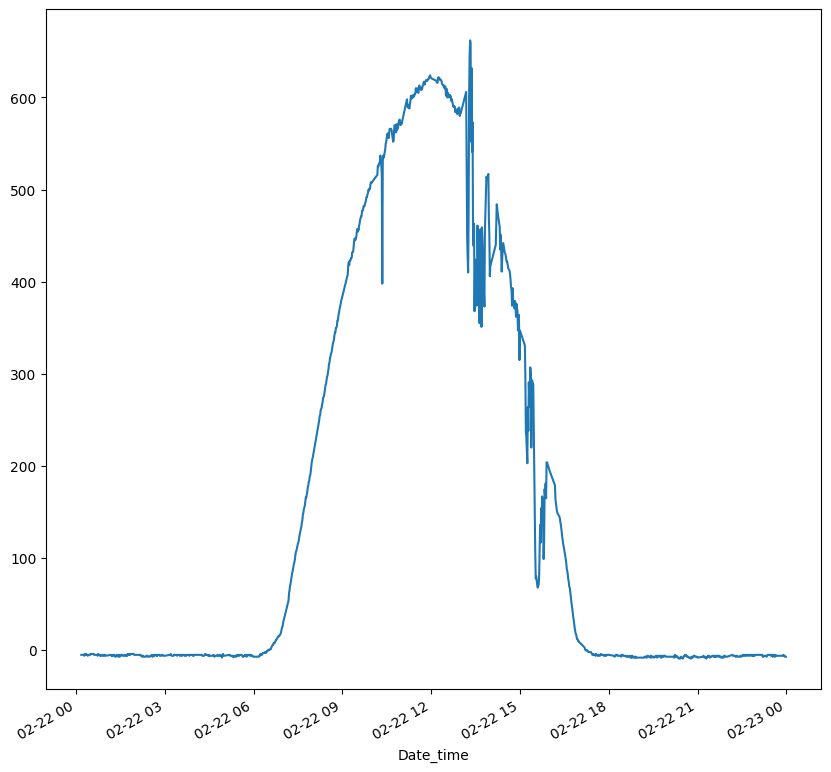

In [48]:
new_data["2022-02-22"]["PIRP_value"].plot(figsize=(10,10))

In [49]:
#Got a problem in the X axis. Normally it has to have Time values
new_data.index

DatetimeIndex(['2022-02-22 00:11:00', '2022-02-22 00:12:00',
               '2022-02-22 00:13:00', '2022-02-22 00:14:00',
               '2022-02-22 00:15:00', '2022-02-22 00:16:00',
               '2022-02-22 00:17:00', '2022-02-22 00:18:00',
               '2022-02-22 00:19:00', '2022-02-22 00:20:00',
               ...
               '2022-02-22 23:51:00', '2022-02-22 23:52:00',
               '2022-02-22 23:53:00', '2022-02-22 23:54:00',
               '2022-02-22 23:55:00', '2022-02-22 23:56:00',
               '2022-02-22 23:57:00', '2022-02-22 23:58:00',
               '2022-02-22 23:59:00', '2023-02-22 00:00:00'],
              dtype='datetime64[ns]', name='Date_time', length=1201, freq=None)

Plotting with Time values in the X axis

Text(0.5, 0, 'Time')

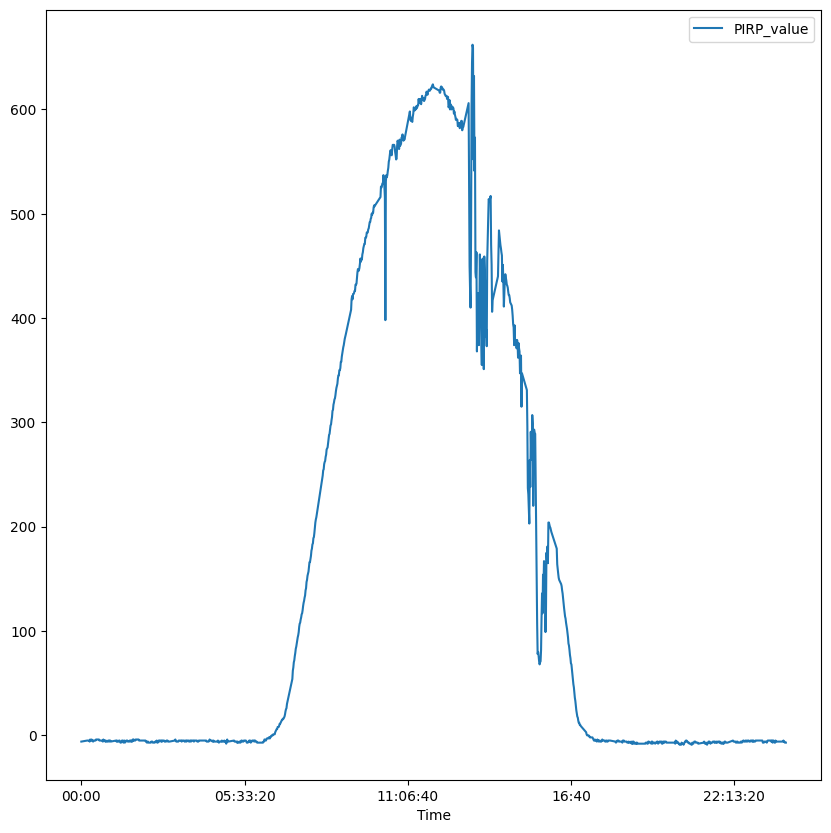

In [50]:

new_data['Time'] = new_data.index.time

# Plot the 'PIRP_value' column with only the time on the x-axis
new_data.plot(x='Time', y='PIRP_value', figsize=(10, 10))

# Set the x-axis label
plt.xlabel('Time')

In [51]:
new_data

,PIRP_value,Time
Date_time,,
2022-02-22 00:11:00,-5,00:11:00
2022-02-22 00:12:00,-5,00:12:00
2022-02-22 00:13:00,-5,00:13:00
2022-02-22 00:14:00,-5,00:14:00
2022-02-22 00:15:00,-5,00:15:00
...,...,...
2022-02-22 23:56:00,-6,23:56:00
2022-02-22 23:57:00,-7,23:57:00
2022-02-22 23:58:00,-7,23:58:00


Let's classify our values

In [52]:
new_data["PIRP_value"].describe()

count    1201.000000
mean      156.455454
std       226.708473
min        -9.000000
25%        -6.000000
50%        -5.000000
75%       364.000000
max       662.000000
Name: PIRP_value, dtype: float64

<Axes: >

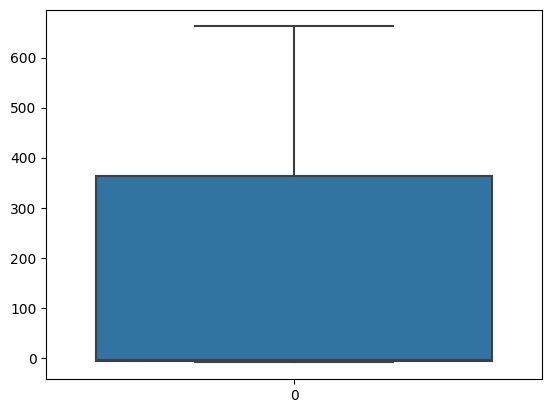

In [53]:
sns.boxplot(new_data["PIRP_value"])

In [54]:
def repartir(pirp):
  if pirp<=1:
    return "class 0"
  elif pirp>1 and pirp <=100:
    return "class 1"
  elif pirp>100:
    return "class 2"

new_data["Category"]=new_data["PIRP_value"].map(repartir)




In [55]:
new_data

,PIRP_value,Time,Category
Date_time,,,
2022-02-22 00:11:00,-5,00:11:00,class 0
2022-02-22 00:12:00,-5,00:12:00,class 0
2022-02-22 00:13:00,-5,00:13:00,class 0
2022-02-22 00:14:00,-5,00:14:00,class 0
2022-02-22 00:15:00,-5,00:15:00,class 0
...,...,...,...
2022-02-22 23:56:00,-6,23:56:00,class 0
2022-02-22 23:57:00,-7,23:57:00,class 0
2022-02-22 23:58:00,-7,23:58:00,class 0


In [56]:
new_data.groupby(["Category"])["Category"].count()

Category
class 0    674
class 1     77
class 2    450
Name: Category, dtype: int64

In [57]:
# We remark that the dominant class is 0...
new_data["PIRP_value"].max()

662

In [58]:
new_data["Category"].value_counts()

class 0    674
class 2    450
class 1     77
Name: Category, dtype: int64

<Axes: >

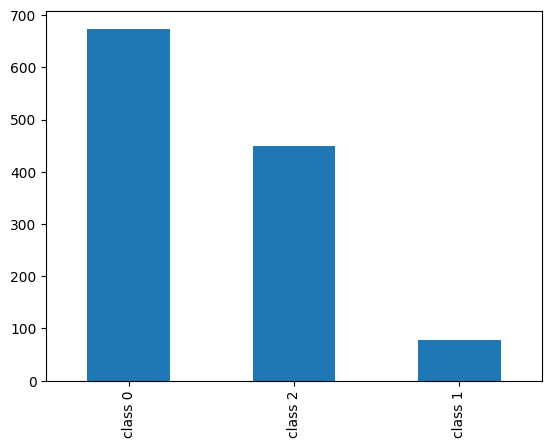

In [59]:
new_data["Category"].value_counts().plot.bar()

In [60]:
new_data.shape

(1201, 3)

In [61]:
new_data["Category"].dtype

dtype('O')

# 5- **Saving the modified csv file**

In [62]:
new_data.to_csv("data.csv",sep=';',index=True)